In [192]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

# 1- Set the Working directory¶

In [193]:
os.chdir("/Users/ajeet/Google Drive/DSAssignment/ZS")

In [194]:
ls

sample submission.csv        testWHST.csv
test.csv                     train.csv*
testDataOR.csv               trainDataOR.csv
testDfEncode.csv             trainDfEncode.csv
testDfEncodeWithStreet.csv   trainDfEncodeWithStreet.csv
testFinalANN.csv             trainWHST.csv


# 2- Load the Data--(Dataset - datset)

In [195]:
Dataset = pd.read_csv("train.csv")

In [196]:
Dataset.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG,CAMIS
0,TACOSSSSSSS,BROOKLYN,3398,FULTON ST,11208.0,7182773780,Mexican,6/8/2016,Violations were cited in the following area(s).,89.0,NaN,NaN,8/28/2017,Initial Inspection,Pre-permit (Non-operational),Critical,86566813
1,SPOLINI'S,QUEENS,11625,METROPOLITAN AVENUE,11418.0,7188055852,Italian,2/18/2016,Violations were cited in the following area(s).,23.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,Critical,84913823
2,EL DORADO CAFE,QUEENS,10202,ROOSEVELT AVENUE,11368.0,7184265992,"Latin (Cuban, Dominican, Puerto Rican, South &...",3/4/2015,Violations were cited in the following area(s).,7.0,A,3/4/2015,8/28/2017,Initial Inspection,Cycle Inspection,Critical,70749585
3,SANREMO PIZZA,QUEENS,5601,MYRTLE AVENUE,11385.0,7184971903,Pizza,12/4/2014,Violations were cited in the following area(s).,12.0,A,12/4/2014,8/28/2017,Initial Inspection,Cycle Inspection,Critical,59396548
4,95 SOUTH,BROOKLYN,778,FRANKLIN AVENUE,11238.0,3477506180,American,6/3/2017,Violations were cited in the following area(s).,11.0,NaN,NaN,8/28/2017,Initial Inspection,Inter-Agency Task Force,Not Critical,79915156


In [197]:
testDataset = pd.read_csv("test.csv")

In [198]:
testDataset.head()

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CAMIS
0,ROCKIN' RAW,MANHATTAN,171,SULLIVAN STREET,10012.0,2124773777,Vegetarian,5/7/2015,Violations were cited in the following area(s).,7.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,35773502
1,HONG KONG RESTAURANT,QUEENS,10259,JAMAICA AVENUE,11418.0,7188463300,Chinese,1/22/2015,Violations were cited in the following area(s).,10.0,A,1/22/2015,8/28/2017,Initial Inspection,Cycle Inspection,92746946
2,UNCLE VANYA,MANHATTAN,315,WEST 54 STREET,10019.0,2122620542,Russian,12/7/2015,Violations were cited in the following area(s).,14.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,28205432
3,GABRIEL KREUTHER,MANHATTAN,37,W 42ND ST,10036.0,2122575826,French,7/21/2015,Violations were cited in the following area(s).,9.0,A,7/21/2015,8/28/2017,Initial Inspection,Pre-permit (Operational),53192030
4,CHIFA RESTAURANT,QUEENS,7320,NORTHERN BOULEVARD,11372.0,7188980108,Peruvian,2/7/2017,Violations were cited in the following area(s).,16.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,79547153


##### <font color = blue><b><i>Make a copy of original Dataset--</i></b></font>

In [199]:
dataset = Dataset.copy()

In [200]:
test_dataset = testDataset.copy()

In [201]:
dataset.head(2)

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG,CAMIS
0,TACOSSSSSSS,BROOKLYN,3398,FULTON ST,11208.0,7182773780,Mexican,6/8/2016,Violations were cited in the following area(s).,89.0,NaN,NaN,8/28/2017,Initial Inspection,Pre-permit (Non-operational),Critical,86566813
1,SPOLINI'S,QUEENS,11625,METROPOLITAN AVENUE,11418.0,7188055852,Italian,2/18/2016,Violations were cited in the following area(s).,23.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,Critical,84913823


In [202]:
test_dataset.head(2)

,DBA,BORO,BUILDING,STREET,ZIPCODE,PHONE,CUISINE DESCRIPTION,INSPECTION DATE,ACTION,SCORE,GRADE,GRADE DATE,RECORD DATE,INSPECTION NO.,INSPECTION_TYPE,CAMIS
0,ROCKIN' RAW,MANHATTAN,171,SULLIVAN STREET,10012.0,2124773777,Vegetarian,5/7/2015,Violations were cited in the following area(s).,7.0,NaN,NaN,8/28/2017,Initial Inspection,Cycle Inspection,35773502
1,HONG KONG RESTAURANT,QUEENS,10259,JAMAICA AVENUE,11418.0,7188463300,Chinese,1/22/2015,Violations were cited in the following area(s).,10.0,A,1/22/2015,8/28/2017,Initial Inspection,Cycle Inspection,92746946


In [203]:
dataset.shape

(215955, 17)

In [204]:
test_dataset.shape

(23995, 16)

# Clean Data

In [205]:
colToRemove = ['PHONE','INSPECTION DATE','GRADE DATE','RECORD DATE','CAMIS','DBA']

In [206]:
#Drop Columns
trainData = dataset.drop(colToRemove, axis = 1)
testData = test_dataset.drop(colToRemove, axis = 1)

In [207]:
trainData.shape

(215955, 11)

In [208]:
dataset.shape

(215955, 17)

In [209]:
testData.shape

(23995, 10)

In [210]:
test_dataset.shape

(23995, 16)

In [211]:
trainData.head()

,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,ACTION,SCORE,GRADE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG
0,BROOKLYN,3398,FULTON ST,11208.0,Mexican,Violations were cited in the following area(s).,89.0,NaN,Initial Inspection,Pre-permit (Non-operational),Critical
1,QUEENS,11625,METROPOLITAN AVENUE,11418.0,Italian,Violations were cited in the following area(s).,23.0,NaN,Initial Inspection,Cycle Inspection,Critical
2,QUEENS,10202,ROOSEVELT AVENUE,11368.0,"Latin (Cuban, Dominican, Puerto Rican, South &...",Violations were cited in the following area(s).,7.0,A,Initial Inspection,Cycle Inspection,Critical
3,QUEENS,5601,MYRTLE AVENUE,11385.0,Pizza,Violations were cited in the following area(s).,12.0,A,Initial Inspection,Cycle Inspection,Critical
4,BROOKLYN,778,FRANKLIN AVENUE,11238.0,American,Violations were cited in the following area(s).,11.0,NaN,Initial Inspection,Inter-Agency Task Force,Not Critical


In [212]:
text = trainData['INSPECTION_TYPE'][0]

In [213]:
trainData.shape[0]

215955

In [214]:
import re

In [215]:
text

'Pre-permit (Non-operational) '

In [216]:
text = re.sub("[^a-zA-Z]", " ", text)

In [217]:
text

'Pre permit  Non operational  '

In [218]:
trainData['INSPECTION_TYPE'][0] = text

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [219]:
textColumns = ['BORO','STREET','CUISINE DESCRIPTION','ACTION','GRADE','INSPECTION NO.','INSPECTION_TYPE']

In [220]:
trainData['INSPECTION_TYPE'][4]

'Inter-Agency Task Force '

In [221]:
trainData['INSPECTION_TYPE'] = trainData['INSPECTION_TYPE'].str.replace('[^a-zA-Z]', ' ')


In [222]:
trainData['INSPECTION_TYPE'][4]

'Inter Agency Task Force '

In [223]:
for var in textColumns:
    trainData[var] = trainData[var].str.replace('[^a-zA-Z0-9]', ' ')
    testData[var] = testData[var].str.replace('[^a-zA-Z0-9]', ' ')
    print("-------------------------Next Variable--------------------")
        
    
    

-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------
-------------------------Next Variable--------------------


In [224]:
trainData['BUILDING'] = trainData['BUILDING'].str.replace('[^0-9]', '')
testData['BUILDING'] = testData['BUILDING'].str.replace('[^0-9]', '')

In [225]:
trainData['BUILDING'] = trainData['BUILDING'].replace('', np.nan, regex=True)
testData['BUILDING'] = testData['BUILDING'].replace('', np.nan, regex=True)

In [226]:
trainData['STREET'].value_counts()

BROADWAY                   8016
3 AVENUE                   3150
5 AVENUE                   2327
2 AVENUE                   2290
8 AVENUE                   1914
ROOSEVELT AVENUE           1768
1 AVENUE                   1741
LEXINGTON AVENUE           1701
NORTHERN BOULEVARD         1677
AMSTERDAM AVENUE           1672
7 AVENUE                   1653
3RD AVE                    1601
9 AVENUE                   1549
JAMAICA AVENUE             1540
2ND AVE                    1481
ROOSEVELT AVE              1330
QUEENS BOULEVARD           1275
5TH AVE                    1228
8TH AVE                    1189
NORTHERN BLVD              1140
FULTON STREET              1071
FLATBUSH AVENUE            1043
MYRTLE AVENUE               983
NOSTRAND AVENUE             977
AVENUE U                    947
GRAND STREET                916
1ST AVE                     904
LEXINGTON AVE               897
9TH AVE                     872
4 AVENUE                    842
                           ... 
EAST 6 S

##### Handle The Target Variabel in the train Data

In [227]:
trainData['CRITICAL FLAG'] = trainData['CRITICAL FLAG'].astype(object)

In [228]:
trainData.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
GRADE                   object
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

In [229]:
trainData['CRITICAL FLAG'].value_counts()

Critical          118888
Not Critical       93402
Not Applicable      3665
Name: CRITICAL FLAG, dtype: int64

In [230]:
3665/trainData.shape[0]

0.016971128244310157

less than 2% of the target variable having the value - Not Applicable , so drop all the rows having this value

In [231]:
trainDf = trainData[trainData['CRITICAL FLAG'] != 'Not Applicable']

In [232]:
testDf = testData.copy()

In [233]:
trainDf.shape

(212290, 11)

In [234]:
trainData.shape

(215955, 11)

# 4- Missing value Analysis

In [235]:
trainDf.isnull().sum()

BORO                        0
BUILDING                  521
STREET                      0
ZIPCODE                     0
CUISINE DESCRIPTION         0
ACTION                      0
SCORE                    9769
GRADE                  107266
INSPECTION NO.              0
INSPECTION_TYPE             0
CRITICAL FLAG               0
dtype: int64

##### 1- GRADE

In [236]:
107266/trainDf.shape[0]





0.505280512506477

There are more that 50% rows has missing data in the Grade column- so we need to remove this column

In [237]:
trainDf = trainDf.drop('GRADE', axis = 1)


In [238]:
testDf = testDf.drop('GRADE', axis = 1)

In [239]:
trainDf.isnull().sum()

BORO                      0
BUILDING                521
STREET                    0
ZIPCODE                   0
CUISINE DESCRIPTION       0
ACTION                    0
SCORE                  9769
INSPECTION NO.            0
INSPECTION_TYPE           0
CRITICAL FLAG             0
dtype: int64

In [240]:
trainDf.dropna(inplace=True)

In [241]:
trainDf.shape

(202021, 10)

In [242]:
trainDf.isnull().sum()

BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
CUISINE DESCRIPTION    0
ACTION                 0
SCORE                  0
INSPECTION NO.         0
INSPECTION_TYPE        0
CRITICAL FLAG          0
dtype: int64

##### Test Data

In [243]:
testDf.isnull().sum()

BORO                      0
BUILDING                 58
STREET                    0
ZIPCODE                   0
CUISINE DESCRIPTION       0
ACTION                   55
SCORE                  1366
INSPECTION NO.           55
INSPECTION_TYPE           0
dtype: int64

We have to impute all missing data

In [244]:
testDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

In [245]:
# for var in testDf.columns:
#     if(testDf[var].isnull().sum()>0):
#         print(var)
#         print(testDf[var].value_counts())

In [246]:
testDf['BUILDING'].fillna(0, inplace = True)

In [247]:
testDf['ACTION'].fillna('Violations were cited in the following area s', inplace = True)

In [248]:
testDf['INSPECTION NO.'].fillna('Initial Inspection', inplace = True)

In [249]:
testDf['SCORE'].fillna(testDf['SCORE'].median(), inplace = True)

In [250]:
testDf.isnull().sum()

BORO                   0
BUILDING               0
STREET                 0
ZIPCODE                0
CUISINE DESCRIPTION    0
ACTION                 0
SCORE                  0
INSPECTION NO.         0
INSPECTION_TYPE        0
dtype: int64

# 3- Data Type Conversion

In [251]:
trainDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

We do not need , Phone, any dates to predict and also CAMIS
So for model building, need to remove--




In [252]:
testDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

Categorical- BORO, BUILDING, STREET, ZIPCODE,CUISINE DESCRIPTION, ACTION,GRADE, INSPECTION NO., INSPECTION_TYPE ,CRITICAL FLAG
Numerical- SCORE,

So only need to convert ZIPCODE column from numerical to categorical-

In [253]:
trainDf['ZIPCODE'] = trainDf['ZIPCODE'].astype(object)
testDf['ZIPCODE'] = testDf['ZIPCODE'].astype(object)

In [254]:
testDf.dtypes

BORO                    object
BUILDING                object
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

In [255]:
trainDf['BUILDING'] = trainDf['BUILDING'].astype(int)
testDf['BUILDING'] = testDf['BUILDING'].astype(int)

In [256]:
testDf.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
dtype: object

In [257]:
trainDf.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

# Outlier Analysis

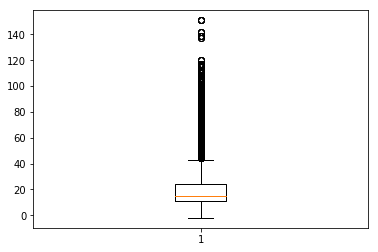

In [258]:
plt.boxplot(trainDf['SCORE'])
plt.show()

In [259]:
#Detect and delete outliers from data

#count = 0  
q75, q25 = np.percentile(trainDf.loc[:,"SCORE"], [75 ,25])
iqr = q75 - q25

min = q25 - (iqr*1.5)
max = q75 + (iqr*1.5)
print(min)
print(max)
   
print(len(trainDf[trainDf['SCORE']<=min]))
print(len(trainDf[trainDf['SCORE']>=max]))

-8.5
43.5
0
10837


##### New dataset created after Removing all observation having outliers

In [260]:
trainDataOR = trainDf[trainDf['SCORE']<=max]

In [261]:
testDataOR = testDf.copy()

In [262]:
trainDataOR.shape

(191184, 10)

In [263]:
trainDf.shape

(202021, 10)

##### Now , These pre-processed Dataframe - save to the file

In [264]:
trainDataOR['STREET'].dtypes == 'object'

True

In [265]:
for var in trainDataOR.columns:
    if(trainDataOR[var].dtypes == 'object'):
        trainDataOR[var] = trainDataOR[var].astype(object)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [266]:
for var in testDataOR.columns:
    if(testDataOR[var].dtypes == 'object'):
        testDataOR[var] = testDataOR[var].astype(object)

In [267]:
trainDataOR.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

In [268]:
trainDataOR.to_csv("trainDataOR.csv",index=False)

In [269]:
testDataOR.to_csv("testDataOR.csv",index=False)

# Read Data

In [270]:
trainDataOR = pd.read_csv("trainDataOR.csv")
testDataOR = pd.read_csv("testDataOR.csv")

In [271]:
trainDataOR.shape

(191184, 10)

In [272]:
testDataOR.shape

(23995, 9)

In [273]:
trainDataOR.head()

,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,ACTION,SCORE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG
0,QUEENS,11625,METROPOLITAN AVENUE,11418.0,Italian,Violations were cited in the following area s,23.0,Initial Inspection,Cycle Inspection,Critical
1,QUEENS,10202,ROOSEVELT AVENUE,11368.0,Latin Cuban Dominican Puerto Rican South ...,Violations were cited in the following area s,7.0,Initial Inspection,Cycle Inspection,Critical
2,QUEENS,5601,MYRTLE AVENUE,11385.0,Pizza,Violations were cited in the following area s,12.0,Initial Inspection,Cycle Inspection,Critical
3,BROOKLYN,778,FRANKLIN AVENUE,11238.0,American,Violations were cited in the following area s,11.0,Initial Inspection,Inter Agency Task Force,Not Critical
4,BROOKLYN,3179,ATLANTIC AVE,11208.0,Hamburgers,Violations were cited in the following area s,7.0,Initial Inspection,Pre permit Operational,Critical


## Data Cleaning in Street

In [274]:
trainDataOR['STREET'].value_counts()

BROADWAY                    7105
3 AVENUE                    2822
5 AVENUE                    2117
2 AVENUE                    2105
8 AVENUE                    1725
ROOSEVELT AVENUE            1584
LEXINGTON AVENUE            1560
1 AVENUE                    1529
NORTHERN BOULEVARD          1505
7 AVENUE                    1494
AMSTERDAM AVENUE            1450
3RD AVE                     1412
JAMAICA AVENUE              1408
9 AVENUE                    1402
2ND AVE                     1318
QUEENS BOULEVARD            1169
ROOSEVELT AVE               1146
5TH AVE                     1039
8TH AVE                      993
NORTHERN BLVD                980
FULTON STREET                971
FLATBUSH AVENUE              947
NOSTRAND AVENUE              894
MYRTLE AVENUE                876
AVENUE U                     848
1ST AVE                      812
LEXINGTON AVE                785
9TH AVE                      780
GRAND STREET                 762
4 AVENUE                     727
          

In [275]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('AVENUE','AVE')

In [276]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('RD ',' ')
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('ND ',' ')
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('TH ',' ')

In [277]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('ST ',' ')

In [278]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('BOULEVARD','BLVD')

In [279]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('STREET','ST')

In [280]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('PLACE','PL')

In [281]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('LANE','LN')

In [282]:
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('CENTER','CTR')
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('SQUARE','SQ')
trainDataOR['STREET'] = trainDataOR['STREET'].str.replace('BANKER','BANK')

In [283]:
trainDataOR['STREET'].value_counts()

BROADWAY                               7105
3 AVE                                  4277
2 AVE                                  3500
5 AVE                                  3206
8 AVE                                  2810
ROOSEVELT AVE                          2730
NORTHERN BLVD                          2485
1 AVE                                  2412
LEXINGTON AVE                          2345
7 AVE                                  2198
9 AVE                                  2197
AMSTERDAM AVE                          2087
JAMAICA AVE                            2084
QUEENS BLVD                            1842
FULTON ST                              1505
FLATBUSH AVE                           1490
NOSTRA AVE                             1453
MYRTLE AVE                             1370
MAIN ST                                1247
4 AVE                                  1230
GRA ST                                 1198
37 AVE                                 1166
86 ST                           

##### Test Data

In [284]:
testDataOR['STREET'].value_counts()

BROADWAY                    888
3 AVENUE                    346
5 AVENUE                    282
2 AVENUE                    264
8 AVENUE                    226
7 AVENUE                    208
LEXINGTON AVENUE            205
ROOSEVELT AVENUE            189
JAMAICA AVENUE              183
AMSTERDAM AVENUE            181
1 AVENUE                    180
3RD AVE                     179
2ND AVE                     177
NORTHERN BOULEVARD          172
9 AVENUE                    160
5TH AVE                     152
QUEENS BOULEVARD            151
ROOSEVELT AVE               142
8TH AVE                     132
MYRTLE AVENUE               123
FLATBUSH AVENUE             119
NORTHERN BLVD               117
FULTON STREET               114
NOSTRAND AVENUE             106
LEXINGTON AVE               105
AVENUE U                    103
GRAND STREET                102
37 AVENUE                    95
MADISON AVENUE               89
MAIN ST                      89
                           ... 
EAST   9

In [285]:
testDataOR['STREET'] = testDataOR['STREET'].str.replace('AVENUE','AVE')

In [286]:
testDataOR['STREET'] = testDataOR['STREET'].str.replace('RD ',' ')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('ND ',' ')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('TH ',' ')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('ST ',' ')

In [287]:
testDataOR['STREET'] = testDataOR['STREET'].str.replace('BOULEVARD','BLVD')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('STREET','ST')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('PLACE','PL')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('LANE','LN')

In [288]:
testDataOR['STREET'] = testDataOR['STREET'].str.replace('CENTER','CTR')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('SQUARE','SQ')
testDataOR['STREET'] = testDataOR['STREET'].str.replace('BANKER','BANK')

In [289]:
testDataOR['STREET'].value_counts()

BROADWAY               888
3 AVE                  528
2 AVE                  454
5 AVE                  442
8 AVE                  368
ROOSEVELT AVE          331
LEXINGTON AVE          310
7 AVE                  297
NORTHERN BLVD          289
1 AVE                  271
JAMAICA AVE            268
AMSTERDAM AVE          260
9 AVE                  245
QUEENS BLVD            238
FLATBUSH AVE           197
MYRTLE AVE             188
FULTON ST              180
NOSTRA AVE             179
MAIN ST                158
GRA ST                 156
37 AVE                 156
4 AVE                  149
LIBERTY AVE            132
MADISON AVE            131
WESTCHESTER AVE        127
86 ST                  122
METROPOLITAN AVE       120
HILLSIDE AVE           119
FORE AVE               117
CONEY ISLA AVE         117
                      ... 
E 104 ST                 1
EA  122 ST               1
UNION HALL ST            1
BAYSIDE DRIVE            1
WHITESTONE EXPY          1
E 48 ST                  1
E

In [290]:
trainDataOR.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                float64
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

##### With STREET Column

In [291]:
trainWHST = trainDataOR.copy()
testWHST = testDataOR.copy()

In [292]:
# trainWHST = trainWHST.drop('STREET', axis = 1)

# testWHST = testWHST.drop('STREET', axis = 1)

In [293]:
# trainWHST.to_csv("trainWHST.csv",index=False)
# testWHST.to_csv("testWHST.csv",index=False)

In [294]:
trainWHST['ZIPCODE'] = trainWHST['ZIPCODE'].astype(object)
testWHST['ZIPCODE'] = testWHST['ZIPCODE'].astype(object)

# Data Scaling

(array([1.0000e+00, 0.0000e+00, 6.4000e+01, 0.0000e+00, 5.7000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.7330e+03, 0.0000e+00,
        0.0000e+00, 1.1260e+03, 0.0000e+00, 2.5590e+03, 0.0000e+00,
        3.4680e+03, 0.0000e+00, 1.8230e+03, 0.0000e+00, 0.0000e+00,
        8.6810e+03, 0.0000e+00, 4.4500e+03, 0.0000e+00, 1.1417e+04,
        0.0000e+00, 1.2948e+04, 0.0000e+00, 1.2195e+04, 0.0000e+00,
        0.0000e+00, 2.1047e+04, 0.0000e+00, 1.4459e+04, 0.0000e+00,
        3.1490e+03, 0.0000e+00, 3.6560e+03, 0.0000e+00, 0.0000e+00,
        4.0090e+03, 0.0000e+00, 6.4900e+03, 0.0000e+00, 5.6600e+03,
        0.0000e+00, 6.5730e+03, 0.0000e+00, 6.0510e+03, 0.0000e+00,
        0.0000e+00, 5.4850e+03, 0.0000e+00, 5.6410e+03, 0.0000e+00,
        4.6660e+03, 0.0000e+00, 4.9520e+03, 0.0000e+00, 0.0000e+00,
        4.3000e+03, 0.0000e+00, 3.9450e+03, 0.0000e+00, 3.6320e+03,
        0.0000e+00, 2.8220e+03, 0.0000e+00, 2.5730e+03, 0.0000e+00,
        0.0000e+00, 2.5710e+03, 0.0000e+00, 2.19

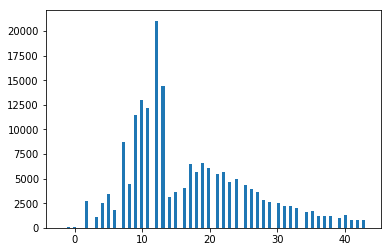

In [295]:
#Normality check
%matplotlib inline  
plt.hist(trainWHST['SCORE'], bins=100)

In [296]:
trainWHST.dtypes

BORO                    object
BUILDING                 int64
STREET                  object
ZIPCODE                 object
CUISINE DESCRIPTION     object
ACTION                  object
SCORE                  float64
INSPECTION NO.          object
INSPECTION_TYPE         object
CRITICAL FLAG           object
dtype: object

In [297]:
#Nomalisation
cnames = ['SCORE','BUILDING']
for i in cnames:
    print(i)
    print(trainWHST[i].max())
    rangeOfData = (trainWHST[i].max() - trainWHST[i].min())
    trainWHST[i] = (trainWHST[i] - trainWHST[i].min())/(rangeOfData)

SCORE
43.0
BUILDING
94179419


In [298]:
cnames = ['SCORE','BUILDING']
for i in cnames:
    print(i)
    print(testWHST[i].max())
    rangeOfData = (testWHST[i].max() - testWHST[i].min())
    testWHST[i] = (testWHST[i] - testWHST[i].min())/(rangeOfData)

SCORE
139.0
BUILDING
94179419


In [299]:
testWHST.shape

(23995, 9)

In [300]:
testWHST.head()

,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,ACTION,SCORE,INSPECTION NO.,INSPECTION_TYPE
0,MANHATTAN,1.815683e-06,SULLIVAN ST,10012,Vegetarian,Violations were cited in the following area s,0.063830,Initial Inspection,Cycle Inspection
1,QUEENS,1.089304e-04,JAMAICA AVE,11418,Chinese,Violations were cited in the following area s,0.085106,Initial Inspection,Cycle Inspection
2,MANHATTAN,3.344680e-06,WE 54 ST,10019,Russian,Violations were cited in the following area s,0.113475,Initial Inspection,Cycle Inspection
3,MANHATTAN,3.928672e-07,W 42 ST,10036,French,Violations were cited in the following area s,0.078014,Initial Inspection,Pre permit Operational
4,QUEENS,7.772399e-05,NORTHERN BLVD,11372,Peruvian,Violations were cited in the following area s,0.127660,Initial Inspection,Cycle Inspection


# Data Encoding(Dummy variable)--

##### STEP-1: Create logistic data. Save target variable first

In [301]:
#STEP-1: Create logistic data. Save target variable first
trainDfEncode = pd.DataFrame(trainWHST['CRITICAL FLAG'])

In [302]:
trainDfEncode.head()

,CRITICAL FLAG
0,Critical
1,Critical
2,Critical
3,Not Critical
4,Critical


##### STEP-2: Add all continous variables

In [303]:
cnames = ['BUILDING','SCORE']

#STEP-2: Add all continous variables
trainDfEncode = trainDfEncode.join(trainWHST[cnames])

In [304]:
testDfEncode = pd.DataFrame(testWHST['BUILDING'])

In [305]:
testDfEncode = testDfEncode.join(testWHST['SCORE'])

In [306]:
#testDfEncode = testDfEncode.join(testWHST['ZIPCODE'])

In [307]:
testDfEncode.head()

,BUILDING,SCORE
0,1.815683e-06,0.063830
1,1.089304e-04,0.085106
2,3.344680e-06,0.113475
3,3.928672e-07,0.078014
4,7.772399e-05,0.127660


In [308]:
trainDfEncode.head()

,CRITICAL FLAG,BUILDING,SCORE
0,Critical,0.000123,0.555556
1,Critical,0.000108,0.200000
2,Critical,0.000059,0.311111
3,Not Critical,0.000008,0.288889
4,Critical,0.000034,0.200000


##### STEP-3: Add all categorical variables having more than 10 categories

In [309]:
trainWHST.head(1)

,BORO,BUILDING,STREET,ZIPCODE,CUISINE DESCRIPTION,ACTION,SCORE,INSPECTION NO.,INSPECTION_TYPE,CRITICAL FLAG
0,QUEENS,0.000123,METROPOLITAN AVE,11418,Italian,Violations were cited in the following area s,0.555556,Initial Inspection,Cycle Inspection,Critical


In [310]:
catVar = ['BORO','STREET','CUISINE DESCRIPTION','ACTION','INSPECTION NO.','INSPECTION_TYPE','ZIPCODE']

In [311]:
trainDfEncode = trainDfEncode.join(trainWHST[catVar])

In [312]:
testDfEncode = testDfEncode.join(testWHST[catVar])

In [313]:
trainDfEncode.head()

,CRITICAL FLAG,BUILDING,SCORE,BORO,STREET,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE,ZIPCODE
0,Critical,0.000123,0.555556,QUEENS,METROPOLITAN AVE,Italian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11418
1,Critical,0.000108,0.200000,QUEENS,ROOSEVELT AVE,Latin Cuban Dominican Puerto Rican South ...,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11368
2,Critical,0.000059,0.311111,QUEENS,MYRTLE AVE,Pizza,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11385
3,Not Critical,0.000008,0.288889,BROOKLYN,FRANKLIN AVE,American,Violations were cited in the following area s,Initial Inspection,Inter Agency Task Force,11238
4,Critical,0.000034,0.200000,BROOKLYN,ATLANTIC AVE,Hamburgers,Violations were cited in the following area s,Initial Inspection,Pre permit Operational,11208


In [314]:
testDfEncode.head()

,BUILDING,SCORE,BORO,STREET,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE,ZIPCODE
0,1.815683e-06,0.063830,MANHATTAN,SULLIVAN ST,Vegetarian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,10012
1,1.089304e-04,0.085106,QUEENS,JAMAICA AVE,Chinese,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11418
2,3.344680e-06,0.113475,MANHATTAN,WE 54 ST,Russian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,10019
3,3.928672e-07,0.078014,MANHATTAN,W 42 ST,French,Violations were cited in the following area s,Initial Inspection,Pre permit Operational,10036
4,7.772399e-05,0.127660,QUEENS,NORTHERN BLVD,Peruvian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11372


In [315]:
testDfEncode['BORO'].value_counts()

MANHATTAN        9589
BROOKLYN         5978
QUEENS           5487
BRONX            2138
STATEN ISLAND     803
Name: BORO, dtype: int64

In [316]:
testDfEncode.head()

,BUILDING,SCORE,BORO,STREET,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE,ZIPCODE
0,1.815683e-06,0.063830,MANHATTAN,SULLIVAN ST,Vegetarian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,10012
1,1.089304e-04,0.085106,QUEENS,JAMAICA AVE,Chinese,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11418
2,3.344680e-06,0.113475,MANHATTAN,WE 54 ST,Russian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,10019
3,3.928672e-07,0.078014,MANHATTAN,W 42 ST,French,Violations were cited in the following area s,Initial Inspection,Pre permit Operational,10036
4,7.772399e-05,0.127660,QUEENS,NORTHERN BLVD,Peruvian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11372


In [317]:
for i in catVar:
    temp = pd.get_dummies(trainDfEncode[i], prefix = i)
    temp = temp.drop(temp.columns[[0]], axis=1)
    trainDfEncode = trainDfEncode.join(temp)

In [318]:
trainDfEncode.head(1)

,CRITICAL FLAG,BUILDING,SCORE,BORO,STREET,CUISINE DESCRIPTION,ACTION,INSPECTION NO.,INSPECTION_TYPE,ZIPCODE,...,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11451.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0
0,Critical,0.000123,0.555556,QUEENS,METROPOLITAN AVE,Italian,Violations were cited in the following area s,Initial Inspection,Cycle Inspection,11418,...,0,0,0,0,0,0,0,0,0,0


In [319]:
trainDfEncode = trainDfEncode.drop(catVar, axis=1)

In [320]:
trainDfEncode.shape

(191184, 2777)

In [321]:
trainDfEncode.head(1)

,CRITICAL FLAG,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,STREET_ MARKS S PL,STREET_ NICHOLAS AVE,STREET_ WE 43 ST,...,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11451.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0
0,Critical,0.000123,0.555556,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### TestData

In [322]:
for i in catVar:
    temp = pd.get_dummies(testDfEncode[i], prefix = i)
    temp = temp.drop(temp.columns[[0]], axis=1)
    testDfEncode = testDfEncode.join(temp)
    
testDfEncode = testDfEncode.drop(catVar, axis=1)

In [323]:
testDfEncode.head()

,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,STREET_ MARKS S PL,STREET_ NICHOLAS AVE,STREET_ WE 43 ST,STREET_ ANNS AVE,...,ZIPCODE_11432.0,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0
0,1.815683e-06,0.063830,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.089304e-04,0.085106,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.344680e-06,0.113475,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.928672e-07,0.078014,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,7.772399e-05,0.127660,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Encode the Target variable with label Encoder

In [324]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()


In [325]:
trainDfEncode['CRITICAL FLAG'] = labelEncoder.fit_transform(trainDfEncode['CRITICAL FLAG'])

In [326]:
trainDfEncode.head()

,CRITICAL FLAG,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,STREET_ MARKS S PL,STREET_ NICHOLAS AVE,STREET_ WE 43 ST,...,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11451.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0
0,0,0.000123,0.555556,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000108,0.200000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0.000059,0.311111,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000008,0.288889,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0.000034,0.200000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


##### Making the same dimension of train n test data

In [327]:
trainCols = trainDfEncode.columns
testCols = testDfEncode.columns

In [328]:
len(set(trainCols))

2777

In [329]:
len(set(testCols))

2279

Actaually train data has one extra column, so trainDf has 329 columns.

In [330]:
#take all the columns which are not present in the test data and remove it from the train data.
colToRemoveFromTheTrainData = list(set(trainCols) - set(testCols))

In [331]:
len(colToRemoveFromTheTrainData)

526

In [332]:
#testList= [item for item in trainCols if item not in testCols]

In [333]:
#len(testList)

In [334]:
colToRemoveFromTheTrainData.remove('CRITICAL FLAG')

In [335]:
len(colToRemoveFromTheTrainData)

525

In [336]:
#Now we can remove all these columns from the dfEncodeAll dataset.
trainDfEncode = trainDfEncode.drop(colToRemoveFromTheTrainData, axis = 1)

In [337]:
trainDfEncode.shape

(191184, 2252)

In [338]:
testDfEncode.shape

(23995, 2279)

In [339]:
colToRemoveFromTheTrainData = list(set(testDfEncode.columns) - set(trainDfEncode.columns))

In [340]:
len(colToRemoveFromTheTrainData)

28

In [341]:
#Now we can remove all these columns from the dfEncodeAll dataset.
testDfEncode = testDfEncode.drop(colToRemoveFromTheTrainData, axis = 1)

In [342]:
trainDfEncode.shape

(191184, 2252)

In [343]:
testDfEncode.shape

(23995, 2251)

In [344]:
trainDfEncode.to_csv("trainDfEncodeWithStreet.csv",index=False)
testDfEncode.to_csv("testDfEncodeWithStreet.csv",index=False)

# Model Building

##### Make copy of the dataset

In [154]:
# trainFinal  = pd.read_csv("trainDfEncodeWithStreet.csv")
# testFinal = pd.read_csv("testDfEncodeWithStreet.csv")

In [155]:
trainFinal = trainDfEncode.copy()
testFinal = testDfEncode.copy()

In [345]:
trainFinal.shape

(191184, 2252)

In [156]:
trainFinal.head(2)

,CRITICAL FLAG,BUILDING,SCORE,BORO_BROOKLYN,BORO_MANHATTAN,BORO_QUEENS,BORO_STATEN ISLAND,STREET_ MARKS S PL,STREET_ NICHOLAS AVE,STREET_ WE 43 ST,...,ZIPCODE_11432.0,ZIPCODE_11433.0,ZIPCODE_11434.0,ZIPCODE_11435.0,ZIPCODE_11436.0,ZIPCODE_11691.0,ZIPCODE_11692.0,ZIPCODE_11693.0,ZIPCODE_11694.0,ZIPCODE_11697.0
0,0,0.000123,0.555556,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0.000108,0.200000,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
X = trainFinal.iloc[:,1:].values
y = trainFinal["CRITICAL FLAG"].values

In [158]:
y

array([0, 0, 0, ..., 1, 0, 0])

In [159]:
X_Test = testFinal.values

In [160]:
# Splitting the dataset into the Training set and Test set
from sklearn.cross_validation import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.20, random_state = 0)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# <font color = red>1-Logistic Regression</font>

In [161]:
from sklearn.linear_model import LogisticRegression
classifier_LR = LogisticRegression(random_state = 0)
classifier_LR.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
y_pred = classifier_LR.predict(X_validation)

In [163]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred)

In [164]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, y_pred))

0.5992101890838717


In [167]:
# from sklearn.svm import SVC
# from sklearn.model_selection import cross_val_score
# classifier = SVC(kernel = 'rbf', random_state = 0)
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()
# accuracies.std()

In [168]:
# accuracies = cross_val_score(estimator = classifier, X = X_train, y = y_train, cv = 10)
# accuracies.mean()

In [169]:
from sklearn.naive_bayes import GaussianNB

In [170]:
# Fitting Naive Bayes to the Training set
#from sklearn.naive_bayes import GaussianNB
classifier_NB = GaussianNB()
classifier_NB.fit(X_train, y_train)

# Predicting the Test set results
y_pred_NB = classifier_NB.predict(X_validation)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_validation, y_pred_NB)


In [171]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, y_pred_NB))

0.48076470434396


In [172]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_NB, X = X_train, y = y_train, cv = 10,n_jobs = -1)

In [173]:
accuracies.mean()

0.46759973645885744

In [174]:
import keras
#Sequence library help us to initialize the NN
from keras.models import Sequential

#Dense library used ti create the Layer of the NN
from keras.layers import Dense
from keras.layers import Dropout

/Users/ajeet/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [175]:
X_train.shape

(152947, 2251)

In [348]:
X_validation.shape

(38237, 2251)

In [349]:
classifier_ANN = Sequential()

In [350]:

classifier_ANN.add(Dense(output_dim = 1125, init = 'uniform', activation = 'relu', input_dim = 2251))
classifier_ANN.add(Dropout(0.35))
classifier_ANN.add(Dense(output_dim = 1125, init = 'uniform', activation = 'relu'))
classifier_ANN.add(Dropout(0.35))
classifier_ANN.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier_ANN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=2251, units=1125, kernel_initializer="uniform")`
  
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=1125, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [351]:
classifier_ANN.fit(X_train, y_train, batch_size = 1000, nb_epoch = 15)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Epoch 1/15
152947/152947 [==============================] - 66s 434us/step - loss: 0.6679 - acc: 0.5962
Epoch 2/15
152947/152947 [==============================] - 55s 359us/step - loss: 0.6550 - acc: 0.6159
Epoch 3/15
152947/152947 [==============================] - 48s 314us/step - loss: 0.6487 - acc: 0.6223
Epoch 4/15
152947/152947 [==============================] - 53s 346us/step - loss: 0.6428 - acc: 0.6274
Epoch 5/15
152947/152947 [==============================] - 49s 323us/step - loss: 0.6372 - acc: 0.6322
Epoch 6/15
152947/152947 [==============================] - 56s 367us/step - loss: 0.6313 - acc: 0.6370
Epoch 7/15
152947/152947 [==============================] - 58s 378us/step - loss: 0.6253 - acc: 0.6427
Epoch 8/15
152947/152947 [==============================] - 60s 395us/step - loss: 0.6194 - acc: 0.6457
Epoch 9/15
152947/152947 [==============================] - 62s 403us/step - loss: 0.6132 - acc: 0.6506
Epoch 10/15
152947/152947 [==============================] - 57s

In [353]:
# Predicting the Test set results
y_pred = classifier_ANN.predict(X_validation)

In [363]:
y_pred = (y_pred > 0.5)

In [364]:
# calculate accuracy
from sklearn import metrics
print(metrics.accuracy_score(y_validation, y_pred))

0.5974579595679578


In [179]:
# from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV

In [181]:
# def build_classifier(optimizer):
#     classifier = Sequential()
#     classifier.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu', input_dim = 310))
#     classifier.add(Dense(units = 150, kernel_initializer = 'uniform', activation = 'relu'))
#     classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
#     classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
#     return classifier
# classifier = KerasClassifier(build_fn = build_classifier)
# parameters = {'batch_size': [500, 800,100,1000],
#               'epochs': [10, 20,30],
#               'optimizer': ['adam', 'rmsprop']}
# grid_search = GridSearchCV(estimator = classifier,
#                            param_grid = parameters,
#                            scoring = 'accuracy',
#                            cv = 10)
# grid_search = grid_search.fit(X_train, y_train)
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

In [184]:
# best_parameters = grid_search.best_params_
# best_accuracy = grid_search.best_score_

In [185]:
#best_accuracy

In [186]:
#best_parameters

In [190]:
classifier = Sequential()
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu', input_dim = 310))
classifier.add(Dropout(0.20))
classifier.add(Dense(output_dim = 150, init = 'uniform', activation = 'relu'))
classifier.add(Dropout(0.25))
classifier.add(Dense(output_dim = 1, init = 'uniform', activation = 'sigmoid'))
classifier.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=310, units=150, kernel_initializer="uniform")`
  
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=150, kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/Users/ajeet/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  


In [191]:
classifier.fit(X_train, y_train, batch_size = 1000, nb_epoch = 10)

/Users/ajeet/anaconda3/lib/python3.6/site-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


ValueError: Error when checking input: expected dense_10_input to have shape (310,) but got array with shape (2251,)

In [189]:
FinalPred_ANN =  classifier.predict(X_Test)
FinalPred_ANN = (FinalPred_ANN > .9999)


ValueError: Error when checking : expected dense_7_input to have shape (310,) but got array with shape (2251,)

In [ ]:
testFinalANN = pd.DataFrame(testDataset['CAMIS'])

In [ ]:
testFinalANN['Critical Flag'] = pd.DataFrame(FinalPred_ANN)

In [ ]:
testFinalANN.head()

In [ ]:
testFinalANN['Critical Flag'].replace({False: 'Critical', True: 'Not Critical'}, inplace=True)

In [ ]:
testFinalANN.to_csv("testFinalANN.csv",index=False)